# Bike Rent Prediction Project
In this case study, our task is to create a machine learning model which can predict Predict the number of bikes getting rented at any day based on the day's weather and bikers data.


The flow of the case study is as below:
* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple Regression algorithms
* Selecting the best Model
* Deploying the best model in production

## 1. Reading the data into python
The data has one file "BikeRentData.csv". This file contains 17379 rent details.
Problem statement: Predict the number of bikes getting rented at any day based on the day's weather and bikers data


## Data description:
Definition of each column is described below-

* season: The current season (1:winter, 2:spring, 3:summer, 4:fall)
* yr: year (0: 2011, 1:2012)
* mnth: month ( 1 to 12)
* hr: hour of the day (0 to 23)
* holiday: whether day is holiday or not
* weekday: day of the week
* workingday: If the day is working day or not.For weekday=1:5(Not weekend) and holiday= 0(Not holiday) then workingday=1 otherwise 0.
* weathersit: The Weather forecast for the day
 * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: Normalized temperature in Celsius.
* atemp: Normalized feeling temperature in Celsius.
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered


In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
import pandas as pd
import numpy as np
BikeRentData=pd.read_csv('BikeRentData.csv',index_col=[0],encoding='latin')
print('Shape before deleting duplicate values:', BikeRentData.shape)

# Removing duplicate rows if any
BikeRentData=BikeRentData.drop_duplicates()
print('Shape After deleting duplicate values:', BikeRentData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
BikeRentData.head(10)

Shape before deleting duplicate values: (17379, 14)
Shape After deleting duplicate values: (17377, 14)


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,13,16
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,32,40
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,27,32
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,10,13
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,1
6,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1,1
7,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,0,2
8,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,2,3
9,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,7,8
10,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,6,14


## 2. Defining the problem statement:
Create a ML model which can predict the apt Price of a Car
Create a ML model which can predict the number of bikes getting rented at any day based on the day's weather and bikers data
Target Variable: cnt
Predictors: season,holiday,weather,registered etc.

## 3. Determining the type of Machine Learning
Based on the problem statement we can understand that we need to create a supervised ML Regression model,
as the target variable is Continuous.

## 4. Looking at the distribution of Target variable
If target variable's distribution is too skewed then the predictive modeling will not be possible.
Bell curve is desirable but slightly positive skew or negative skew is also fine
When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. 
Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.


<AxesSubplot:>

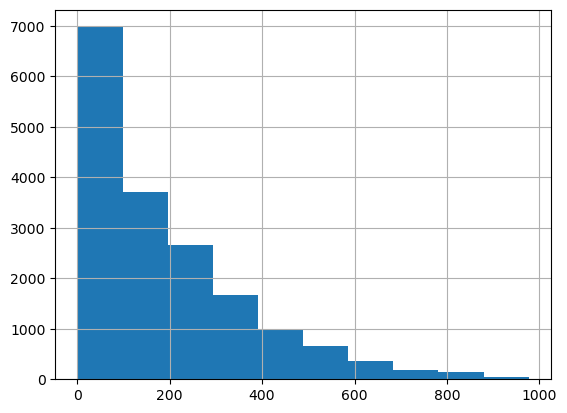

In [4]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
BikeRentData['cnt'].hist()

The data distribution of the target variable is satisfactory to proceed further. 
There are sufficient number of rows for each type of values to learn from.

## 5. Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. 
Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, 
does this column affect the values of the Target variable? For example in this case study, you will ask,
does this column affect the Price of the computer? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python

head() : This helps to see a few sample rows of the data
info() : This provides the summarized information of the data
describe() : This provides the descriptive statistical details of the data
nunique(): This helps us to identify if a column is categorical or continuous

In [5]:
# Looking at sample rows in the data
BikeRentData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [6]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
BikeRentData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17377 entries, 1 to 17379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17377 non-null  int64  
 1   yr          17377 non-null  int64  
 2   mnth        17377 non-null  int64  
 3   hr          17377 non-null  int64  
 4   holiday     17377 non-null  int64  
 5   weekday     17377 non-null  int64  
 6   workingday  17377 non-null  int64  
 7   weathersit  17377 non-null  int64  
 8   temp        17377 non-null  float64
 9   atemp       17377 non-null  float64
 10  hum         17377 non-null  float64
 11  windspeed   17377 non-null  float64
 12  registered  17377 non-null  int64  
 13  cnt         17377 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.0 MB


In [7]:
# Looking at the descriptive statistics of the data
BikeRentData.describe(include='all')

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2.501525,0.502561,6.537435,11.547505,0.028774,3.003568,0.682742,1.425332,0.496993,0.475780,0.627216,0.190108,153.803649,189.483916
std,1.106917,0.500008,3.438722,6.914438,0.167175,2.005744,0.465422,0.639377,0.192553,0.171849,0.192935,0.122343,151.357913,181.387645
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


In [8]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
BikeRentData.nunique()

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
registered    776
cnt           869
dtype: int64

Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created
* season : Categorical Selected
* yr : Qualititive, Rejected
* mnth: Categorical Selected
* hr : Categorical Selected
* holiday: Categorical Selected
* weekday: Categorical Selected
* workingday: Categorical Selected
* weathersit: Categorical Selected
* temp: Continuous Selected
* atemp: Continuous Selected
* hum: Continuous Selected
* windspeed: Continuous Selected
* registered: Continuous Selected
* cnt:    Continuous Selected. This is the target variable


## 6. Removing useless columns from the data

In [9]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['yr']
BikeRentData = BikeRentData.drop(UselessColumns,axis=1)
BikeRentData.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
2,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
3,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
4,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
5,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


## 7. Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

Based on the Basic Data Exploration above, we have spotted six categorical predictors in the data

#### Categorical Predictors:

'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday'

We use bar charts to see how the data is distributed for these categorical columns.

In [10]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

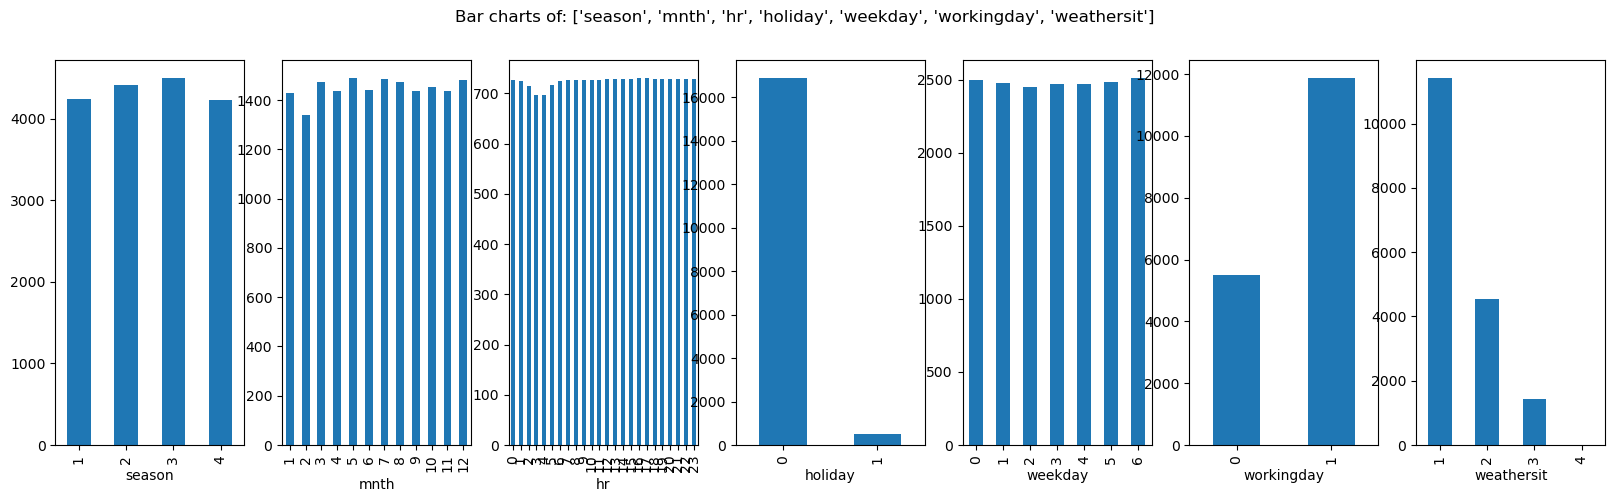

In [11]:
# Calling the function
PlotBarCharts(inpData=BikeRentData, colsToPlot=['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit']) 
                                                 

### Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, five continuous predictor variables 'temp', 'atemp', 'hum', 'windspeed' and 'registered'.


array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'registered'}>, <AxesSubplot:>]],
      dtype=object)

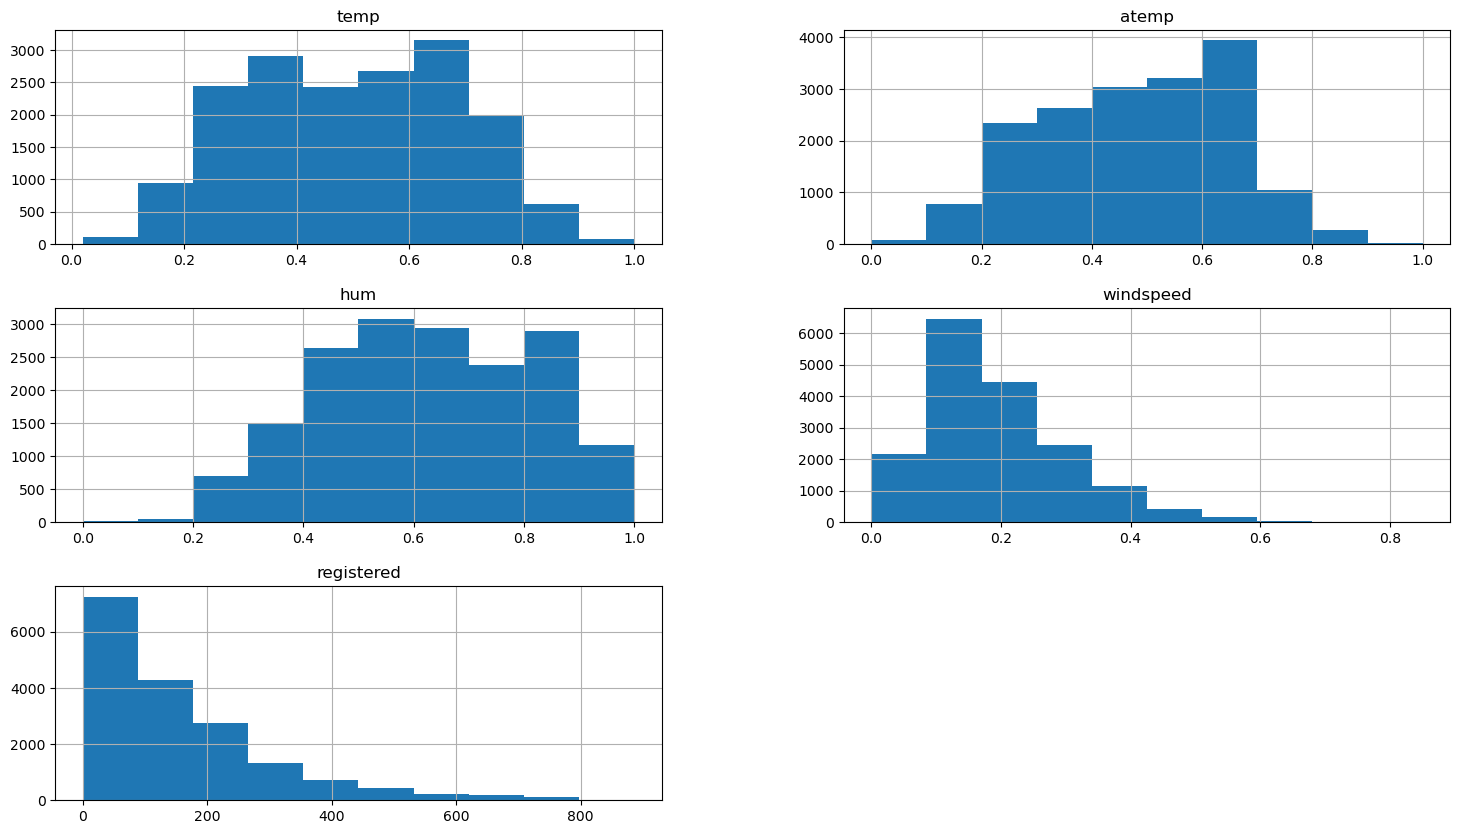

In [12]:
# Plotting histograms of multiple columns together
BikeRentData.hist([ 'temp', 'atemp', 'hum', 'windspeed','registered'], figsize=(18,10))

### Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

Selected Continuous Variables:

* temp : Selected. The distribution is good.
* atemp: Selected. The distribution is good.
* hum: Selected. The distribution is good.
* windspeed: Selected. The distribution is good
* registered: Selected. The distribution is good

## 8. Outlier treatment
There are no prominent outlier, so no need for outlier treatment

## 9. Missing values treatment
Missing values are treated for each column separately.

In [13]:
# Finding how many missing values are there for each column
BikeRentData.isnull().sum()

season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
registered    0
cnt           0
dtype: int64

* There is no missing value in the data.

## 10. Feature Selection (Bi-Variate analysis)
Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

In this case study the Target variable is Continuous, hence below two scenarios will be present

* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

### Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

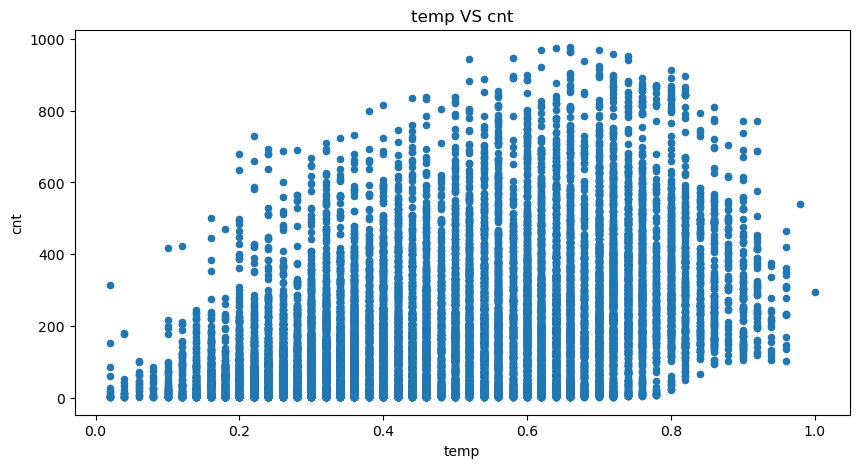

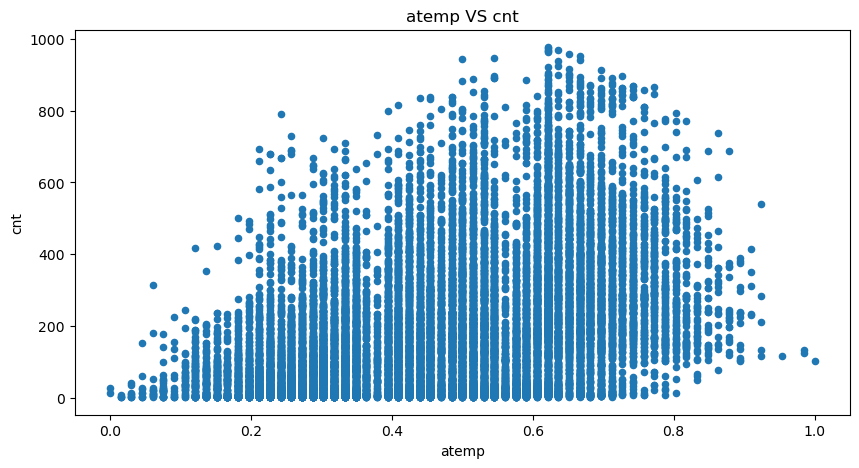

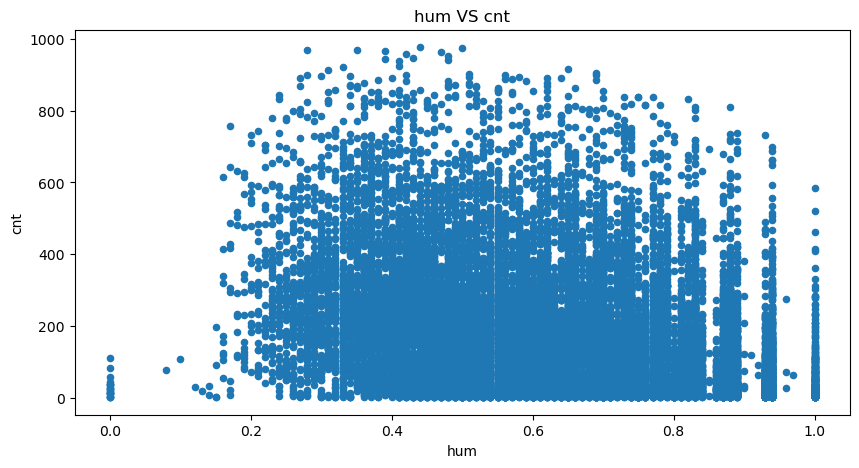

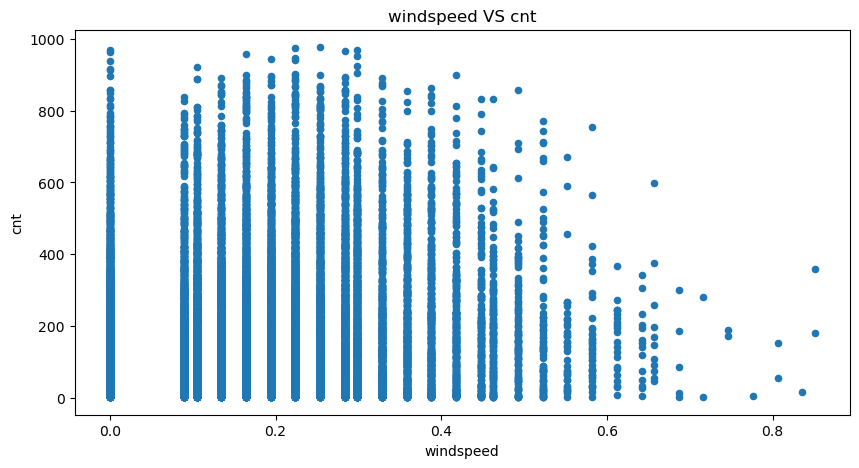

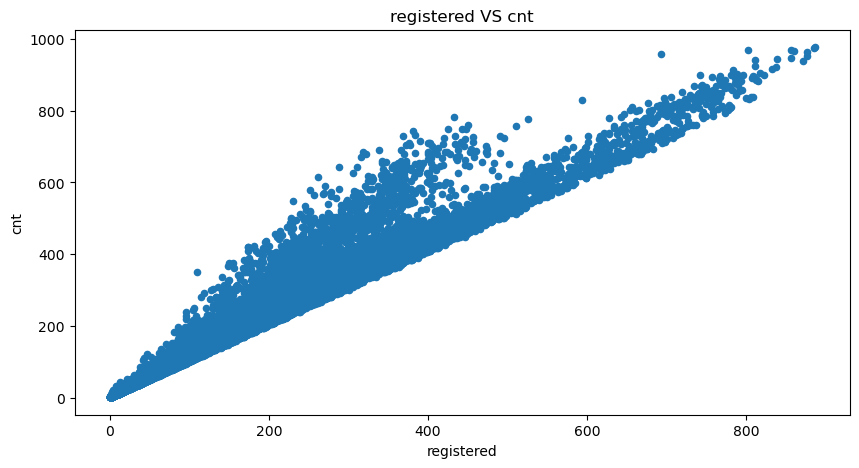

In [14]:
ContinuousCols=['temp', 'atemp', 'hum', 'windspeed','registered']
# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    BikeRentData.plot.scatter(x=predictor, y='cnt', figsize=(10,5), title=predictor+" VS "+ 'cnt')

### Scatter charts interpretation
<b>What should you look for in these scatter charts? </b>

Trend.
You should try to see if there is a visible trend or not. There could be three scenarios
1. Increasing Trend:
This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

2. Decreasing Trend:
This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

3. No Trend:
You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not.
You confirm this by looking at the correlation value.

### Statistical Feature Selection (Continuous Vs Continuous) using Correlation value
​
Pearson's correlation coefficient can simply be calculated as
the covariance between two features $x$ and $y$ (numerator) divided by the product
of their standard deviations (denominator):  

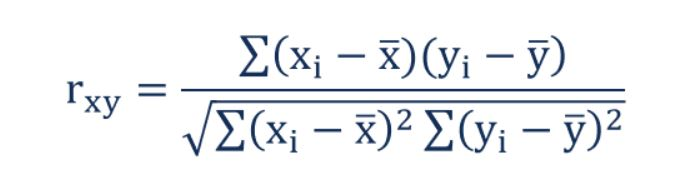

* This value can be calculated only between two numeric columns
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship <b>the sign does not matter</b>
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [15]:
# Calculating correlation matrix
ContinuousCols=['cnt','temp', 'atemp', 'hum', 'windspeed','registered']

# Creating the correlation matrix
CorrelationData=BikeRentData[ContinuousCols].corr()
CorrelationData

,cnt,temp,atemp,hum,windspeed,registered
cnt,1.000000,0.404798,0.400950,-0.322872,0.093155,0.972148
temp,0.404798,1.000000,0.987671,-0.069931,-0.023141,0.335377
atemp,0.400950,0.987671,1.000000,-0.051960,-0.062357,0.332571
hum,-0.322872,-0.069931,-0.051960,1.000000,-0.290070,-0.273891
windspeed,0.093155,-0.023141,-0.062357,-0.290070,1.000000,0.082244
registered,0.972148,0.335377,0.332571,-0.273891,0.082244,1.000000


In [16]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['cnt'][abs(CorrelationData['cnt']) > 0.5]

cnt           1.000000
registered    0.972148
Name: cnt, dtype: float64

<b>Final selected Continuous columns</b>:

'registered'

### Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

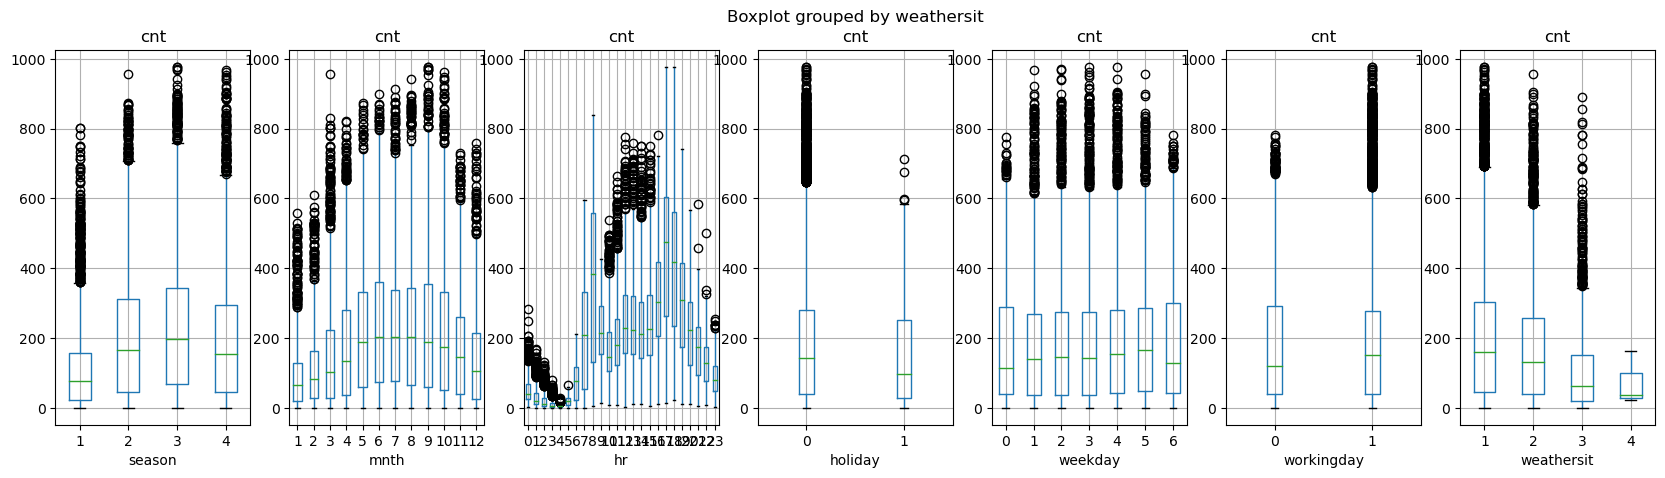

In [17]:
# Box plots for Categorical Target Variable "Price" and continuous predictors
CategoricalColsList=['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(20,5))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    BikeRentData.boxplot(column='cnt', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

### Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with cnt.

In this data, all the categorical predictors looks correlated with the Target variable except "weekday","holiday" and "workingday" they seems like a border cases, as the boxes are close to each other.

We confirm this by looking at the results of ANOVA test below

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [18]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [19]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit']
FunctionAnova(inpData=BikeRentData, 
              TargetVariable='cnt', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

season is correlated with cnt | P-Value: 5.106220835895279e-257
mnth is correlated with cnt | P-Value: 5.2484657372432516e-284
hr is correlated with cnt | P-Value: 0.0
holiday is correlated with cnt | P-Value: 4.495359698010671e-05
weekday is correlated with cnt | P-Value: 0.0018766923121991564
workingday is correlated with cnt | P-Value: 6.675147740900618e-05
weathersit is correlated with cnt | P-Value: 1.4485803474430875e-81


['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable. This is something we guessed by looking at the box plots!

<b>Final selected Categorical columns:</b>

'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit'

### Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [20]:
SelectedColumns=['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'registered']

# Selecting final columns
DataForMLBikeRent=BikeRentData[SelectedColumns]
DataForMLBikeRent.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,registered
1,1,1,0,0,6,0,1,13
2,1,1,1,0,6,0,1,32
3,1,1,2,0,6,0,1,27
4,1,1,3,0,6,0,1,10
5,1,1,4,0,6,0,1,1


In [21]:
# Saving this final data for reference during deployment
DataForMLBikeRent.to_pickle('DataForMLBikeRent.pkl')

In [22]:
import pandas as pd
DataForMLBikeRent=pd.read_pickle('DataForMLBikeRent.pkl')
DataForMLBikeRent.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,registered
1,1,1,0,0,6,0,1,13
2,1,1,1,0,6,0,1,32
3,1,1,2,0,6,0,1,27
4,1,1,3,0,6,0,1,10
5,1,1,4,0,6,0,1,1


## 11. Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this data there is no Ordinal categorical variable which is in string format.

### Converting the nominal variable to numeric using get_dummies()

In [23]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForMLBikeRent)

# Adding Target Variable to the data
DataForML_Numeric['cnt']=BikeRentData['cnt']

# Printing sample rows
DataForML_Numeric.head(20)

,season,mnth,hr,holiday,weekday,workingday,weathersit,registered,cnt
1,1,1,0,0,6,0,1,13,16
2,1,1,1,0,6,0,1,32,40
3,1,1,2,0,6,0,1,27,32
4,1,1,3,0,6,0,1,10,13
5,1,1,4,0,6,0,1,1,1
6,1,1,5,0,6,0,2,1,1
7,1,1,6,0,6,0,1,0,2
8,1,1,7,0,6,0,1,2,3
9,1,1,8,0,6,0,1,7,8
10,1,1,9,0,6,0,1,6,14


## 12. Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [24]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'registered', 'cnt'],
      dtype='object')

In [25]:
# Separate Target Variable and Predictor Variables
TargetVariable='cnt'
Predictors=['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit','registered']

# Simple Linear Regression (only one predictor)
#Predictors=['Age']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Polynomial Regression
# Uncomment below lines if you want to perform polynomial regression
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree = 2, include_bias=False)
#X = poly.fit_transform(X)
#Predictors=poly.get_feature_names()

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=369)

# Quick check on the shapes of train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12163, 8)
(12163,)
(5214, 8)
(5214,)


## 13. Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [26]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12163, 8)
(12163,)
(5214, 8)
(5214,)


## 14.1 Multiple Linear Regression

In [28]:
import time
T1=time.time()
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)


# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

T2=time.time()
print("Time taken:", T2-T1)

LinearRegression()
R2 Value: 0.956816330876403

##### Model Validation and Accuracy Calculations ##########
   cnt  Predictedcnt        APE
0  333         350.0   5.105105
1  732         758.0   3.551913
2  185         227.0  22.702703
3  526         536.0   1.901141
4   13           1.0  92.307692
Mean Accuracy on test data: 28.75463148673755
Median Accuracy on test data: 85.97389248638092

Accuracy values for 10-fold Cross Validation:
 [-74.07929873  26.65796421  59.00921878  49.87501303  14.90766055
  13.94538914  48.55944791  69.51846121  69.73312601  39.90684357]

Final Average Accuracy of the model: 31.8
Time taken: 0.2227001190185547


## 14.2 Decision Trees

DecisionTreeRegressor(max_depth=9)
R2 Value: 0.9888059833924095

##### Model Validation and Accuracy Calculations ##########
   cnt  Predictedcnt
0  333         331.0
1  732         735.0
2  185         217.0
3  526         501.0
4   13           8.0
Mean Accuracy on test data: 89.75476825920957
Median Accuracy on test data: 93.37863719223758

Accuracy values for 10-fold Cross Validation:
 [86.55143627 87.23757501 89.6246551  89.99244744 86.17687925 83.84448087
 89.08472117 91.51393527 90.51594422 86.62698674]

Final Average Accuracy of the model: 88.12
Time taken: 0.5070397853851318


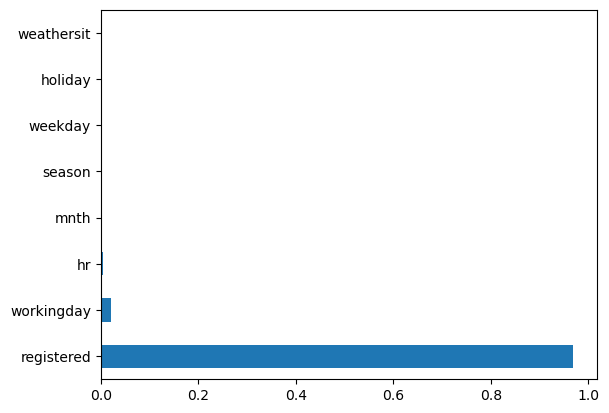

In [29]:
import time
T1=time.time()
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=9,criterion='mse')
# Good Range of hyper parameter Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
prediction=DT.predict(X_test)
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

### Plotting a Decision Tree

In [30]:
# Installing the required library for plotting the decision tree
# Make sure to run all three commands
# 1. Open anaconda Prompt / people with mac run on terminal
# pip install graphviz
# conda install graphviz
# pip install pydotplus

In [31]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ["PATH"] += os.pathsep + 'C:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz'

In [32]:
# Load libraries
#from IPython.display import Image
#from sklearn import tree
#import pydotplus

# Create DOT data
#dot_data = tree.export_graphviz(RegModel, out_file=None, 
#                                feature_names=Predictors, class_names=TargetVariable)
# printing the rules
#print(dot_data)

# Draw graph
#graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
#Image(graph.create_png(), width=8000,height=8000)
# Double click on the graph to zoom in

# The max_depth=9 is too large for plotting

## 14.3 Random Forest

RandomForestRegressor(max_depth=10)
R2 value:  0.9929987196365642

###### Model Validation and Accuracy Calculations ######
   cnt  Predictedcnt
0  333         342.0
1  732         737.0
2  185         217.0
3  526         515.0
4   13          10.0
Mean Accuracy on test data: 90.79020299422734
Median Accuracy on test data: 94.33962264150944

Accuracy values for 10-fold Cross Validation:
 [87.54382632 88.19642252 90.99343205 91.14796138 87.941155   84.6192565
 89.69152061 92.53768039 92.05938718 88.61948398]

Final Average Accuracy of the model: 89.34
Time taken: 22.39535689353943


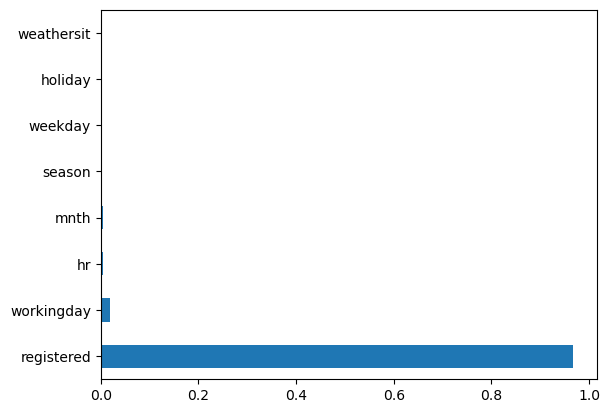

In [33]:
import time
T1=time.time()
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel=RandomForestRegressor(max_depth=10, n_estimators=100, criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train, y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 value: ',metrics.r2_score(y_train,RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n###### Model Validation and Accuracy Calculations ######')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100* ((abs(
    TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy=100- MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy for cross validation
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE=np.mean(100* (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
Custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X, y, cv=10, scoring=Custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

#### Plotting one of the Decision Trees in Random Forest
max_depth=10 is too large to be plotted here


## 14.4 AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.04, n_estimators=100)
R2 value:  0.9947225857073085

###### Model Validation and Accuracy Calculations ######
   cnt  Predictedcnt
0  333         341.0
1  732         739.0
2  185         216.0
3  526         512.0
4   13          10.0
Mean Accuracy on test data: 91.13788642211232
Median Accuracy on test data: 94.56767656895533

Accuracy values for 10-fold Cross Validation:
 [88.43962162 88.52217313 90.83264646 91.28944092 88.13781943 84.68089234
 90.07098752 92.63397884 92.08583721 88.62157992]

Final Average Accuracy of the model: 89.53
Time taken: 34.8562433719635


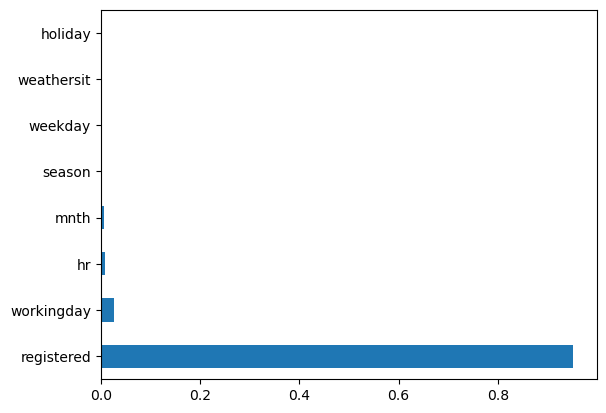

In [34]:
import time
T1=time.time()
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=10)
RegModel=AdaBoostRegressor(n_estimators=100, base_estimator=DTR, learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train, y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 value: ',metrics.r2_score(y_train,AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n###### Model Validation and Accuracy Calculations ######')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100* ((abs(
    TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy=100- MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy for cross validation
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE=np.mean(100* (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
Custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X, y, cv=10, scoring=Custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

####  Plotting one of the Decision trees from Adaboost
max_depth=10 is too large to be plotted here


## 14.5 XGBoost


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', predictor=None,
             random_state=None, reg_alpha=None, ...)
[20:04:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
R2 value:  0.998326878422417

###### Model Validation and Accuracy Calculations #####

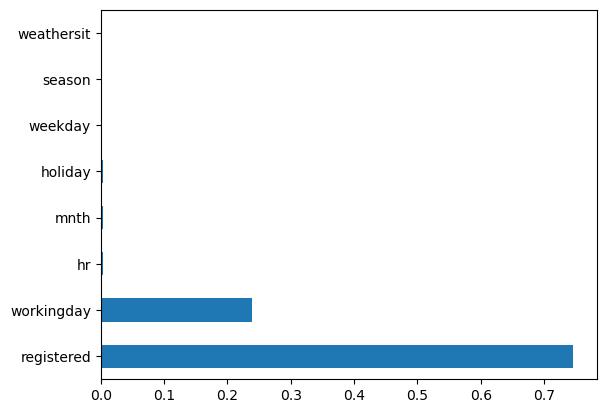

In [35]:
import time
T1=time.time()
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=10,
                     learning_rate=0.1,
                     n_estimators=100,
                     objective='reg:linear',
                     booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train, y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 value: ',metrics.r2_score(y_train,XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n###### Model Validation and Accuracy Calculations ######')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100* ((abs(
    TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy=100- MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy for cross validation
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE=np.mean(100* (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
Custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X, y, cv=10, scoring=Custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

#### Plotting a single Decision tree out of XGBoost
max_depth=10 is too large to be plotted here

## 14.6 KNN

In [36]:
import time
T1=time.time()
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel=KNeighborsRegressor(n_neighbors=2)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train, y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 value: ',metrics.r2_score(y_train,KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n###### Model Validation and Accuracy Calculations ######')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100* ((abs(
    TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy=100- MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy for cross validation
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE=np.mean(100* (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
Custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X, y, cv=10, scoring=Custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

KNeighborsRegressor(n_neighbors=2)
R2 value:  0.9894199219561405

###### Model Validation and Accuracy Calculations ######
   cnt  Predictedcnt
0  333         335.0
1  732         751.0
2  185         172.0
3  526         500.0
4   13           9.0
Mean Accuracy on test data: 72.53454243673963
Median Accuracy on test data: 87.08286985539488

Accuracy values for 10-fold Cross Validation:
 [-9.46120663 29.68830895 70.35764329 60.97815563 32.85602232 60.50657192
 66.50014912 81.49882501 80.73154369 62.83578822]

Final Average Accuracy of the model: 53.65
Time taken: 1.7470965385437012


## 15. Deployment of the Model
Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing XGBOOST as the final model since it is producing the best accuracy on this data.
In order to deploy the model we follow below steps

* Train the model using 100% data available
*  Save the model as a serialized file which can be stored anywhere
*  Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

### Choosing only the most important variables
In this data, the most important predictor variables are 'registered', 'mnth', 'hr', and 'weekday'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [37]:
# Separate Target Variable and Predictor Variables
TargetVariable='cnt'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['registered', 'mnth', 'hr', 'weekday']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Standardization of data ###
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(17377, 4)
(17377,)


#### Cross validating the final model accuracy with less predictors

In [38]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Using final hyperparameters
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=10, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

[20:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

#### Step 1. Retraining the model using 100% data

In [39]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

[20:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


#### Step 2. Save the model as a serialized file which can be stored anywhere

In [40]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
#print('pickle file of Predictive Model is saved at Location:',os.getcwd())

#### Step 3. Create a python function

In [41]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['registered', 'mnth', 'hr', 'weekday']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Gencnt Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(round(PredictionResult))

In [42]:
# Calling the function for some rentals
NewSampleData=pd.DataFrame(
data=[[30,1,1,6],
     [30,3,1,4]],
columns=['registered', 'mnth', 'hr', 'weekday'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   registered  mnth  hr  weekday
0          30     1   1        6
1          30     3   1        4


,Prediction
0,37.0
1,37.0


The Function FunctionPredictResult() can be used to produce the predictions for one or more cases at a time.
Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the cases.

### Deploying a predictive model as an API

#### Creating the model with few parameters

#### Function for predictions API

In [43]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_registered, inp_mnth, inp_hr, inp_weekday):
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_registered, inp_mnth, inp_hr, inp_weekday]],
     columns=['registered', 'mnth', 'hr', 'weekday'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(  inp_registered=30,
                             inp_mnth =1,
                             inp_hr=1,
                             inp_weekday=6
                             )

'{"Prediction":{"0":37.0}}'

In [44]:
# Installing the flask library required to create the API
#!pip install flask

#### Creating Flask API

In [46]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [47]:
app= Flask(__name__)

@app.route('/prediction_api',methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        registered_value = float(request.args.get('registered'))
        mnth_value=float(request.args.get('mnth'))
        hr_value=float(request.args.get('hr'))
        weekday_value=float(request.args.get('weekday'))
                
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                     inp_registered=registered_value,
                                                     inp_mnth =mnth_value,
                                                     inp_hr=hr_value,
                                                     inp_weekday=weekday_value
                                                )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

#### Starting the API engine

In [48]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8080
Press CTRL+C to quit
127.0.0.1 - - [26/Sep/2022 20:11:05] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [26/Sep/2022 20:11:05] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [26/Sep/2022 20:11:12] "GET /prediction_api?registered=36&mnth=9&hr=1&weekday=6 HTTP/1.1" 200 -


### Sample URL to call the API
Copy and paste below URL in the web browser: 
http://127.0.0.1:8080/prediction_api?registered=36&mnth=9&hr=1&weekday=6

This URL can be called by any front end application like Java, Tableau etc. Once the parameters are passed to it, the predictions will be generated.